
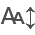

In [1]:
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode( all_interactive = False)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import scipy as sp

# **Chi dorme bene**

### **Dataset iniziale**
Link al dataset: https://www.kaggle.com/datasets/hanaksoy/health-and-sleep-statistics  
Il dataset tratta un campione di 100 persone   
Le colonne presenti sono: Id, age, gender, sleep quality, bedtime, wake-up time, daily steps, calories burned, physical activity level, dietary habits, sleep disorders e medication usage  
Ho apportato delle modifiche al dataset, aggiungendo una colonna con le ore di sonno e un'altra che, in base all'età, indica la generazione di appartenenza


### **Le domande che mi sono posto**
- C'è una corrispondenza tra ore di sonno e qualità del sonno?
- Ci sono differenze nella qualità del sonno tra maschi e femmine?
- L'età è un fattore correlato alla qualità del sonno?
- Com'è la qualità del sonno in relazione alle abitudini?

In [2]:
# Dataset iniziale
df = pd.read_csv('Health_Sleep_Statistics.csv')
df 

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no


In [3]:
df['Bedtime'] = pd.to_datetime(df['Bedtime'], format='%H:%M')
df['Wake-up Time'] = pd.to_datetime(df['Wake-up Time'], format='%H:%M')

In [4]:
df['sleep time'] = df['Wake-up Time'] - df['Bedtime']
df['sleep time'] = df['sleep time'].apply(lambda x: x + pd.Timedelta(days=1) if x < pd.Timedelta(0) else x) # caso in cui ci si sveglia il giorno successivo, altrimenti avremmo un dato negativo
df['sleep time'] = df['sleep time'].dt.total_seconds() / 3600

In [5]:
df['Generation'] = pd.cut(df['Age'], bins=[0, 28, 44, np.inf], labels=['z', 'y', 'x'], right=False)
df

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,sleep time,Generation
0,1,25,f,8,1900-01-01 23:00:00,1900-01-01 06:30:00,8000,2500,medium,healthy,no,no,7.5,z
1,2,34,m,7,1900-01-01 00:30:00,1900-01-01 07:00:00,5000,2200,low,unhealthy,yes,yes,6.5,y
2,3,29,f,9,1900-01-01 22:45:00,1900-01-01 06:45:00,9000,2700,high,healthy,no,no,8.0,y
3,4,41,m,5,1900-01-01 01:00:00,1900-01-01 06:30:00,4000,2100,low,unhealthy,yes,no,5.5,y
4,5,22,f,8,1900-01-01 23:30:00,1900-01-01 07:00:00,10000,2800,high,medium,no,no,7.5,z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,43,m,7,1900-01-01 00:45:00,1900-01-01 07:15:00,6500,2400,medium,medium,no,no,6.5,y
96,97,33,f,8,1900-01-01 23:15:00,1900-01-01 06:15:00,8500,2600,high,medium,no,no,7.0,y
97,98,46,m,4,1900-01-01 01:30:00,1900-01-01 07:00:00,3000,2000,low,unhealthy,yes,yes,5.5,x
98,99,25,f,9,1900-01-01 22:15:00,1900-01-01 06:45:00,9500,2700,high,healthy,no,no,8.5,z


 ### **Correlazione tra quantità e qualità del sonno**
 C'è una correlazione positiva tra quantità di ore dormite e la qualità del sonno, confermato da un coefficiente di Pearson di 0.919 

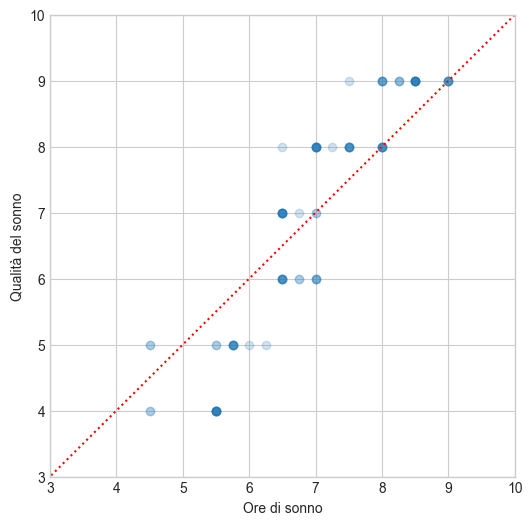

In [6]:
fig = plt.figure(figsize= (6,6))
x = np.linspace(0, 10, 100) 
ax = plt.axes()
ax.plot(x, x, linestyle = ":", color = "red")
ax.set(xlim=(3, 10), ylim=(3, 10), xlabel='Ore di sonno', ylabel='Qualità del sonno');
ax.scatter(df['sleep time'], df['Sleep Quality'] , alpha = 0.2)
plt.xticks(np.arange(3, 11, 1))
plt.yticks(np.arange(3, 11, 1))
plt.show()

In [7]:
def stampa_coeff_corr(a,b):

    S = '{}: {:.3f} (p={:.2e})\n'

    corr_pearson = sp.stats.pearsonr(a, b)
    print( S.format('Pearson', corr_pearson[0], corr_pearson[1]) ) 
    
    corr_spearman = sp.stats.spearmanr(a, b)
    print( S.format('Spearman', corr_spearman[0], corr_spearman[1]) ) 
    
    corr_kendall = sp.stats.kendalltau(a, b)
    print( S.format('Kendall', corr_kendall[0], corr_kendall[1]) )

In [8]:
 stampa_coeff_corr(df['sleep time'],df['Sleep Quality'])

Pearson: 0.919 (p=2.24e-41)

Spearman: 0.945 (p=2.84e-49)

Kendall: 0.861 (p=2.97e-29)



### **Qualità del sonno dei diversi sessi**  
Possiamo vedere che in media le femmine dormono molto meglio rispetto ai maschi

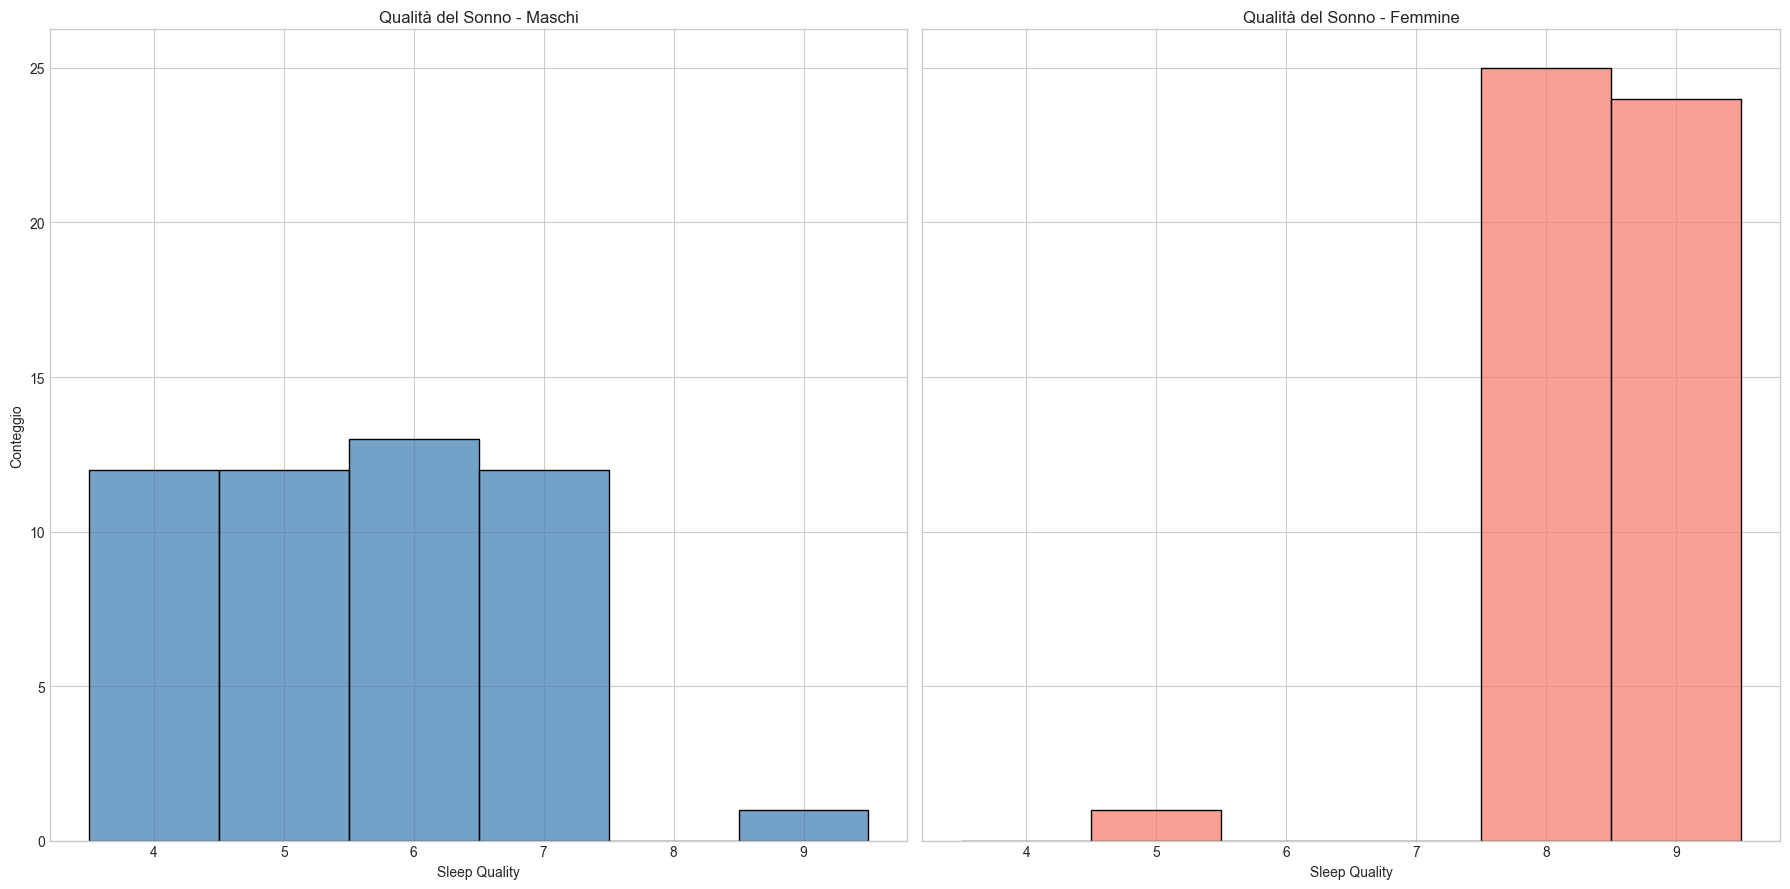

In [9]:
bin_edges = np.arange(3.5, 10.5, 1)
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']


fig, axes = plt.subplots(1, 2, figsize=(18, 9), sharey=True)

# maschi
sns.histplot(df_male['Sleep Quality'], bins=bin_edges,  ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Qualità del Sonno - Maschi')
axes[0].set_xlabel('Sleep Quality')
axes[0].set_ylabel('Conteggio')

# femmine
sns.histplot(df_female['Sleep Quality'], bins=bin_edges, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Qualità del Sonno - Femmine')
axes[1].set_xlabel('Sleep Quality')

plt.tight_layout()
plt.show()

In [10]:
df.groupby('Gender')['Sleep Quality'].aggregate('mean')

Gender
f    8.42
m    5.58
Name: Sleep Quality, dtype: float64

### **Quantità di sonno a confronto**  
Però possiamo anche vedere che le femmine dormono di più in media

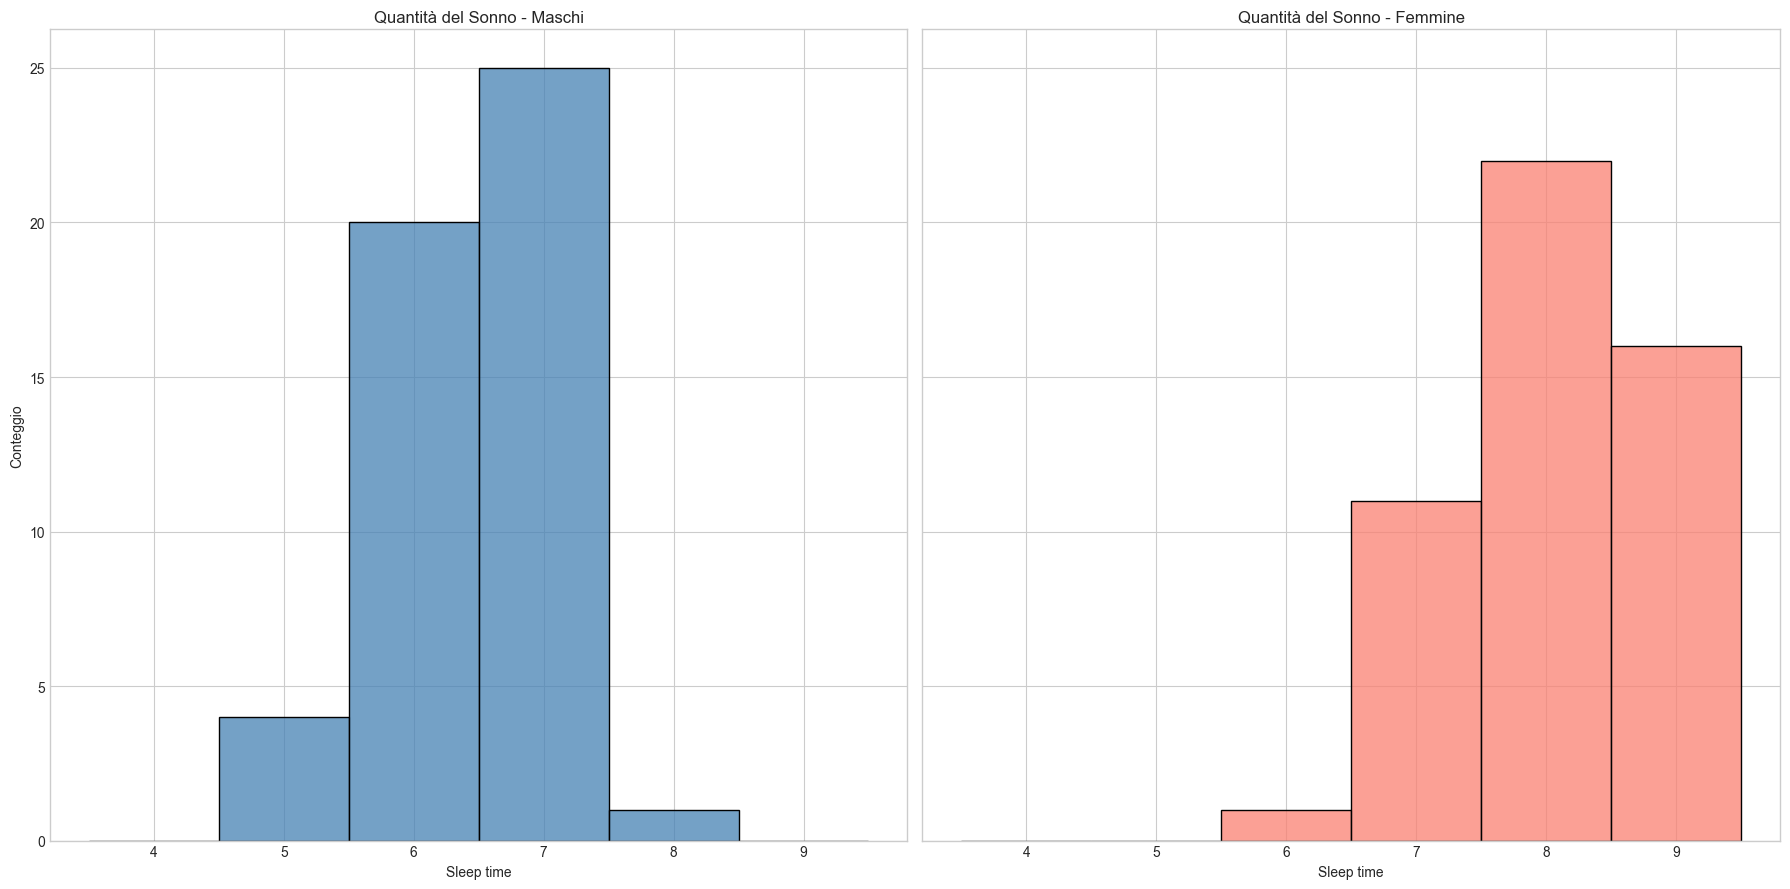

In [11]:
df_male = df[df['Gender'] == 'm']
df_female = df[df['Gender'] == 'f']

# Creazione della figura con due subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 9), sharey=True)

# maschi
sns.histplot(df_male['sleep time'], bins=bin_edges,  ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Quantità del Sonno - Maschi')
axes[0].set_xlabel('Sleep time')
axes[0].set_ylabel('Conteggio')

# femmine
sns.histplot(df_female['sleep time'], bins=bin_edges, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title('Quantità del Sonno - Femmine')
axes[1].set_xlabel('Sleep time')

plt.tight_layout()
plt.show()

In [12]:
df.groupby('Gender')['sleep time'].aggregate('mean')

Gender
f    7.890
m    6.095
Name: sleep time, dtype: float64

### **Correlazione sonno e genere**
Le femmine dormono di più in media, ma a parità di ore dormono meglio. I maschi hanno una qualità media del sonno di 5.58, le femmine di 8.42. Le femmine dormono in media 7.890 ore, i maschi 6.095

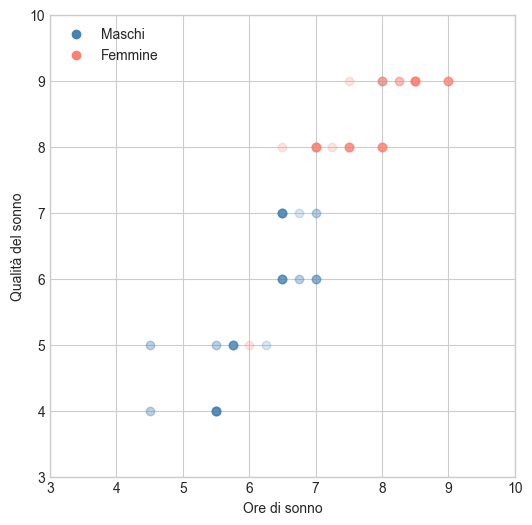

In [13]:
df_masc = df[df['Gender']=='m']
df_fem = df [df['Gender']=='f']
fig = plt.figure(figsize= (6,6))
ax = plt.axes()
ax.set(xlim=(3, 10), ylim=(3, 10), xlabel='Ore di sonno', ylabel='Qualità del sonno')
ax.scatter(df_masc['sleep time'], df_masc['Sleep Quality'] , alpha = 0.2, color = 'steelblue')
ax.scatter(df_fem['sleep time'], df_fem['Sleep Quality'] , alpha = 0.2, color = 'salmon')
ax.scatter([], [], color='steelblue', label="Maschi")
ax.scatter([], [], color='salmon', label="Femmine")
plt.xticks(np.arange(3, 11, 1))
plt.yticks(np.arange(3, 11, 1))
ax.legend(loc = 'upper left')
plt.show()

### **Il sonno delle varie generazioni**  
Si può osservare come le varie generazioni dormono, partendo dalla Generazione X, passando per la Y e arrivando alla Z. Si nota che abbassando l'età aumenta la qualità del sonno, con una correlazione negativa di -0.848

In [14]:
stampa_coeff_corr(df['Age'],df['Sleep Quality'])

Pearson: -0.848 (p=8.09e-29)

Spearman: -0.850 (p=4.99e-29)

Kendall: -0.695 (p=8.68e-21)



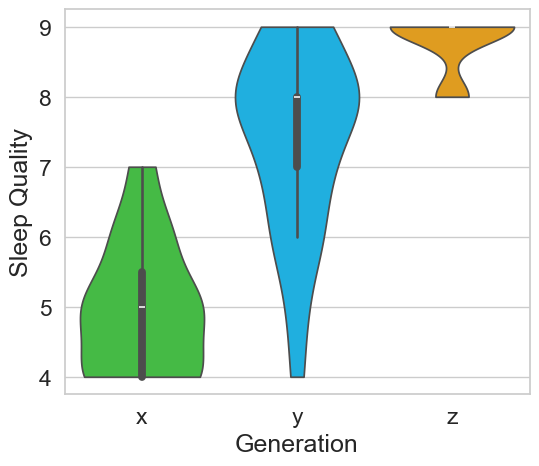

In [15]:
sns.set( style="whitegrid", font_scale=1.5)
fig, ax = plt.subplots(figsize = (6, 5))
custom_palette = ["orange", "deepskyblue", "limegreen"]
sns.violinplot(df, x= 'Generation', y = 'Sleep Quality', order = ['x', 'y', 'z'], palette = custom_palette, hue = 'Generation' , cut = 0  )
plt.show()

In [16]:
sleep_disorder_filtered = df[df['Sleep Disorders'] == 'yes']
df_sleepsh = sleep_disorder_filtered.groupby('Generation', observed=False)['Sleep Disorders'].aggregate('count')
df_total = df.groupby('Generation', observed=False)['User ID'].aggregate('count').reset_index()
df_total.columns = ['Generation', 'Total Users']

# Combina i due DataFrame
df_combined = pd.merge(df_total, df_sleepsh, on='Generation')
df_combined['percentuale'] = df_combined['Sleep Disorders'] / df_combined['Total Users']*100
df_combined

,Generation,Total Users,Sleep Disorders,percentuale
0,z,19,0,0.000000
1,y,54,6,11.111111
2,x,27,20,74.074074


### **Distribuzione dei disturbi del sonno nelle varie generazioni**  
Vediamo che al contrario della slide precedente, come ci aspetteremmo abbiamo un calo dei disturbi del sonno con il diminuire dell'età. La generazione X ha una percentuale del 74.1%, la generazione Y del 11.1%, e la generazione Z dello 0%

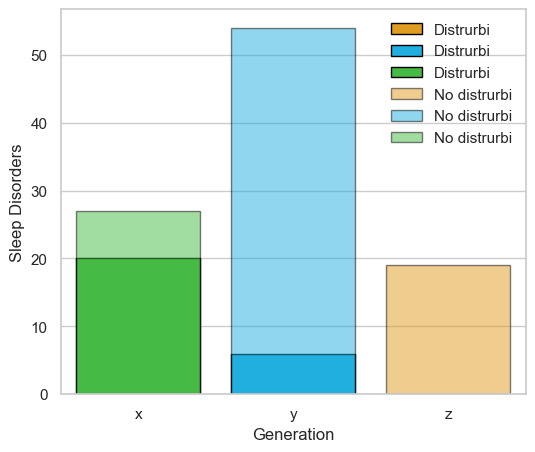

In [17]:
custom_palettelight = ["lightcoral", "lightblue","lightgreen" ]
sns.set(style="whitegrid", font_scale=1)
fig, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x='Generation', y='Sleep Disorders', data=df_combined, palette=custom_palette, hue = 'Generation', order = ['x', 'y', 'z'], alpha = 1, edgecolor = 'black', label = 'Distrurbi')
sns.barplot(x='Generation', y='Total Users', data=df_combined, palette=custom_palette, hue = 'Generation', order = ['x', 'y', 'z'], alpha = 0.5, edgecolor = 'black', label = 'No distrurbi' )
plt.legend()
plt.show()

### **Abitudini e sonno**  
Si nota una correlazione positiva tra sonno passi, con valore di 0.976. Inoltre si osserva che quelli che camminano molto tendono ad avere una buona alimentazione

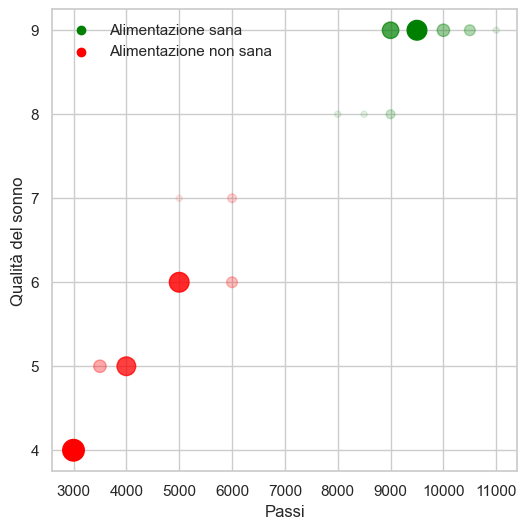

In [18]:
df_healthy = df [df['Dietary Habits'] == 'healthy']
df_unhealthy = df [df['Dietary Habits'] == 'unhealthy']
fig = plt.figure(figsize= (6,6))
# Raggruppa i dati per Daily Steps e Sleep Quality, e conta le occorrenze
df_healthy_agg = df_healthy.groupby(['Daily Steps', 'Sleep Quality']).size().reset_index(name='Counts')
df_unhealthy_agg = df_unhealthy.groupby(['Daily Steps', 'Sleep Quality']).size().reset_index(name='Counts')

# Crea il grafico per i dati "healthy"
plt.scatter(df_healthy_agg['Daily Steps'], 
            df_healthy_agg['Sleep Quality'], 
            s = df_healthy_agg['Counts'] * 20,  # Scala la dimensione con il numero di corrispondenze
            color = 'green', 
            alpha = df_healthy_agg['Counts'] / df_healthy_agg['Counts'].max()
           )  # Scala l'alpha in base ai conteggi 
            
# Crea il grafico per i dati "unhealthy"
plt.scatter(df_unhealthy_agg['Daily Steps'], 
            df_unhealthy_agg['Sleep Quality'], 
            s = df_unhealthy_agg['Counts'] * 20,  # Scala la dimensione con il numero di corrispondenze
            color = 'red', 
            alpha = df_unhealthy_agg['Counts'] / df_unhealthy_agg['Counts'].max()
           ) # Scala l'alpha in base ai conteggi 

# Mostra il grafico
plt.scatter([], [], color='green', label="Alimentazione sana")
plt.scatter([], [], color='red', label="Alimentazione non sana")
plt.xlabel('Passi')
plt.ylabel('Qualità del sonno')

plt.legend()
plt.show()


In [19]:
 stampa_coeff_corr(df['Daily Steps'],df['Sleep Quality'])

Pearson: 0.976 (p=6.24e-67)

Spearman: 0.974 (p=3.17e-65)

Kendall: 0.930 (p=5.81e-34)



### **Utilizzo di medicinali sul sonno**  
Chi utilizza medicinali ha una qualità del sonno peggiore rispetto a coloro che non li usano

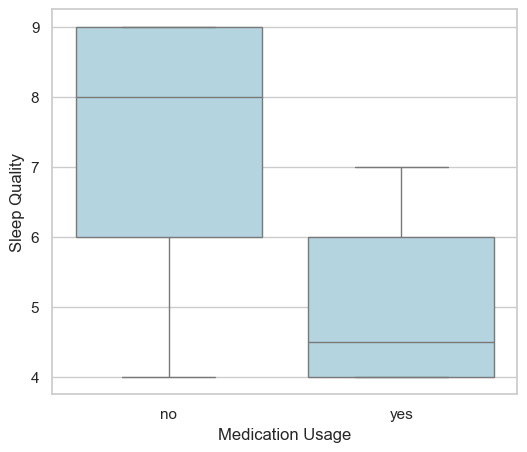

In [20]:
fig, ax = plt.subplots(figsize = (6, 5))
sns.boxplot(df, y = 'Sleep Quality', x = 'Medication Usage', color = 'lightblue');
plt.show()

In [21]:
df_y = df[df['Generation']=='y']
df_y.groupby('Gender')['Sleep Quality'].aggregate('mean')

Gender
f    8.322581
m    6.130435
Name: Sleep Quality, dtype: float64

# **Conclusioni**
### **Punti di forza e debolezza di questa analisi**
**Punti di forza**
- Sono stati evidenziati vari fattori legati al sonno
- I fattori analizzati fanno parte delle abitudini e sono quindi modificabili

**Punti di debolezza**
- Il campione è piuttosto piccolo
- L'analisi sul sesso e sull'età non è completa, poiché le femmine sono in maggioranza giovani